In [2]:
# Import the libraries
import requests
import json
import pandas as pd


# Define the api url and parameters
api_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
api_key = "Your API Key here" # Replace with your api key;

'''
NOTE: if the an API key is not present, the code will return an error.
The error message should be shown in this workbook if accessed on github.
To sign up for an API with the BLS, register at https://data.bls.gov/registrationEngine/
'''

series_id = "CEU3000000001"
start_year = "2015"
end_year = "2024"

# Format the request body as json
data = json.dumps({
    "seriesid": [series_id],
    "startyear": start_year,
    "endyear": end_year,
    "registrationkey": api_key
})

# Send the post request and get the response
response = requests.post(api_url, data=data, headers={"Content-type": "application/json"})
response_data = response.json()

# Check the status of the request
if response_data["status"] == "REQUEST_SUCCEEDED":
    print("Request succeeded")
else:
    print("Request failed")

# Extract the data from the response
series_data = response_data["Results"]["series"][0]["data"]
# Convert the data to a pandas data frame
df = pd.DataFrame(series_data)
# Rename the columns
df = df.rename(columns={"year": "Year", "period": "Month", "value": "Value", "footnotes": "Footnotes"})
# Convert the unemployment rate to numeric
# Reset the index
df = df.reset_index(drop=True)
# Print the data frame
print(df)


Request failed


KeyError: 'series'

In [ ]:
# prompt: print working directory, then place the data of "df" into a .csv file and save it.

import os
print(os.getcwd())
df.to_csv('data.csv', index=False)
df.head()

/content


,Year,Month,periodName,Value,Footnotes
0,2023,M12,December,13013,"[{'code': 'P', 'text': 'preliminary'}]"
1,2023,M11,November,12990,"[{'code': 'P', 'text': 'preliminary'}]"
2,2023,M10,October,12962,[{}]
3,2023,M09,September,12995,[{}]
4,2023,M08,August,13042,[{}]


GOVERNMENT

In [22]:
# prompt: read in the "health_education.xlsx" file

df = pd.read_excel('government.xlsx')

df.head()


,Date,periodName,Value
0,2023-12-01,December,23298
1,2023-11-01,November,23402
2,2023-10-01,October,23267
3,2023-09-01,September,22925
4,2023-08-01,August,21977


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/rt4bicqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/h4_4skto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46860', 'data', 'file=/tmp/tmpf3m75yah/rt4bicqo.json', 'init=/tmp/tmpf3m75yah/h4_4skto.json', 'output', 'file=/tmp/tmpf3m75yah/prophet_modelb63ui2ov/prophet_model-20240109004828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


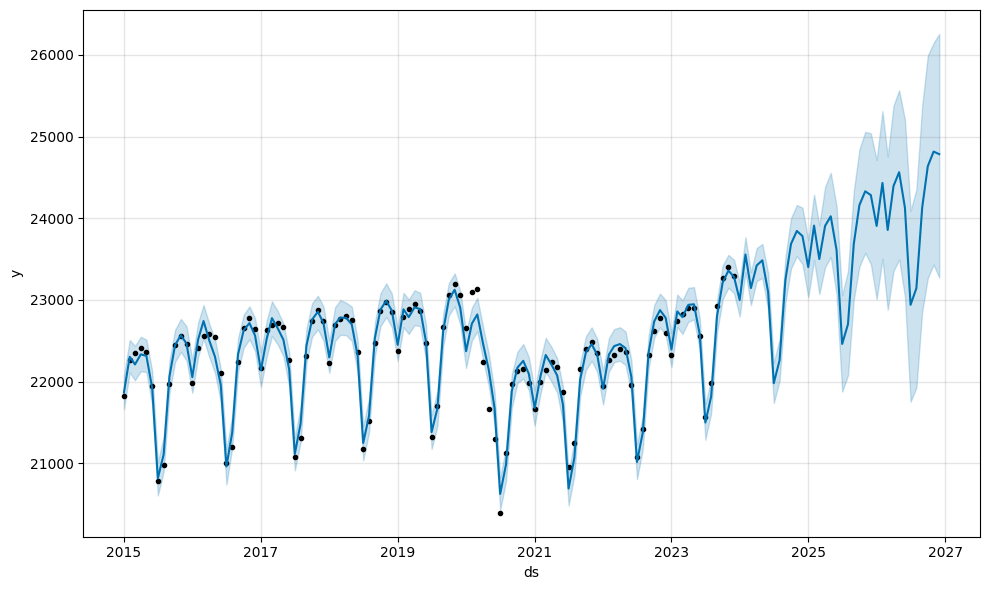

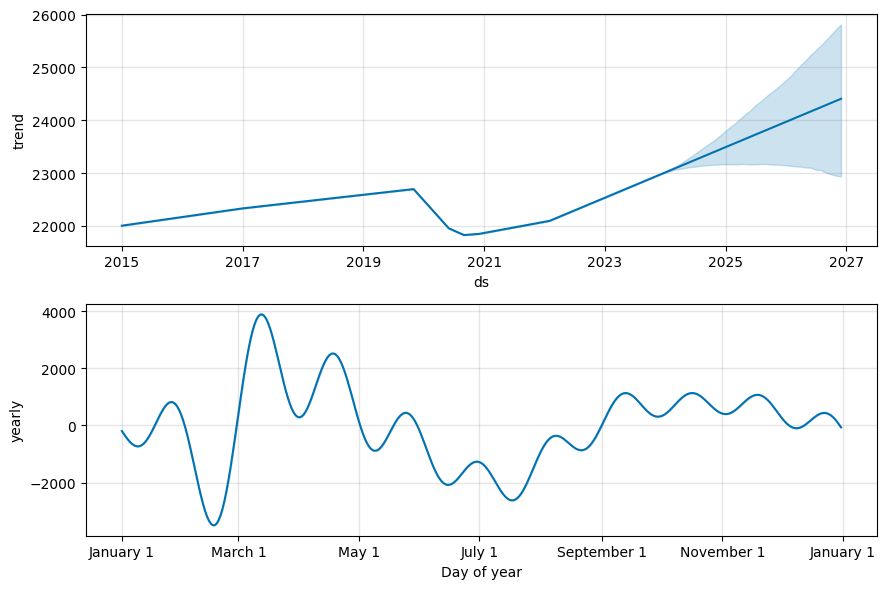

In [23]:
# prompt: create a time series with prophet that reads df in as data

import prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt

df = df.rename(columns={'Date': 'ds'})
df['y'] = df['Value']
#df = df.set_index('ds')

m = prophet.Prophet(interval_width = .9)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.fit(df)
future = m.make_future_dataframe(freq = 'M', periods=36)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.show()

fig2 = plot_components(m, forecast)
plt.show()


HEALTH AND EDUCATION

In [20]:
df = pd.read_excel('health_education.xlsx')

df.head()

,Date,Value,Pre - Covid
0,2023-12-01,26043,0
1,2023-11-01,26070,0
2,2023-10-01,25894,0
3,2023-09-01,25572,0
4,2023-08-01,25243,0


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/cd9rrttk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/0gpbhh5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7366', 'data', 'file=/tmp/tmpf3m75yah/cd9rrttk.json', 'init=/tmp/tmpf3m75yah/0gpbhh5g.json', 'output', 'file=/tmp/tmpf3m75yah/prophet_modelvb7zyj5a/prophet_model-20240109004803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:48:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


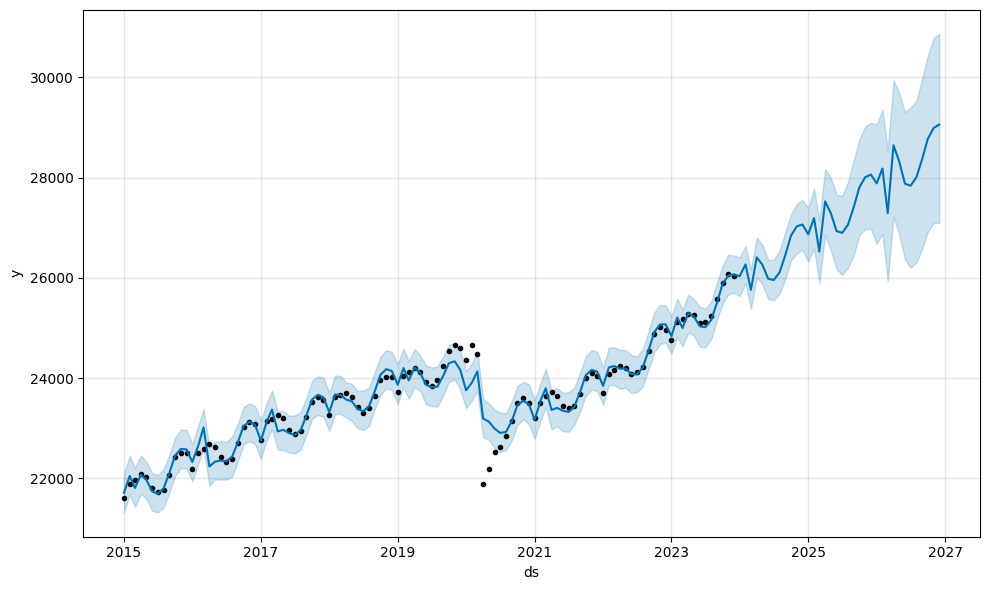

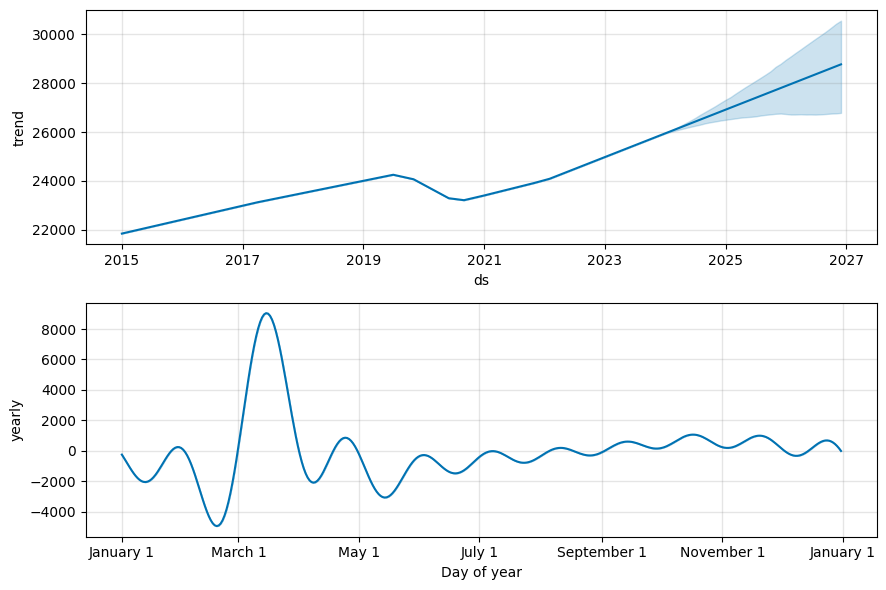

In [21]:
# prompt: create a time series with prophet that reads df in as data

import prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt

df = df.rename(columns={'Date': 'ds'})
df['y'] = df['Value']
#df = df.set_index('ds')

m = prophet.Prophet(interval_width = .9)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.fit(df)
future = m.make_future_dataframe(freq = 'M', periods=36)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.show()

fig2 = plot_components(m, forecast)
plt.show()

Financial Activities

In [18]:
df = pd.read_excel('financial_activities.xlsx')

df.head()

,Date,periodName,Value
0,2023-12-01,December,9171
1,2023-11-01,November,9166
2,2023-10-01,October,9173
3,2023-09-01,September,9151
4,2023-08-01,August,9208


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/cn93o5ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/vby34bh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59679', 'data', 'file=/tmp/tmpf3m75yah/cn93o5ll.json', 'init=/tmp/tmpf3m75yah/vby34bh5.json', 'output', 'file=/tmp/tmpf3m75yah/prophet_modelm04tfp8c/prophet_model-20240109004725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


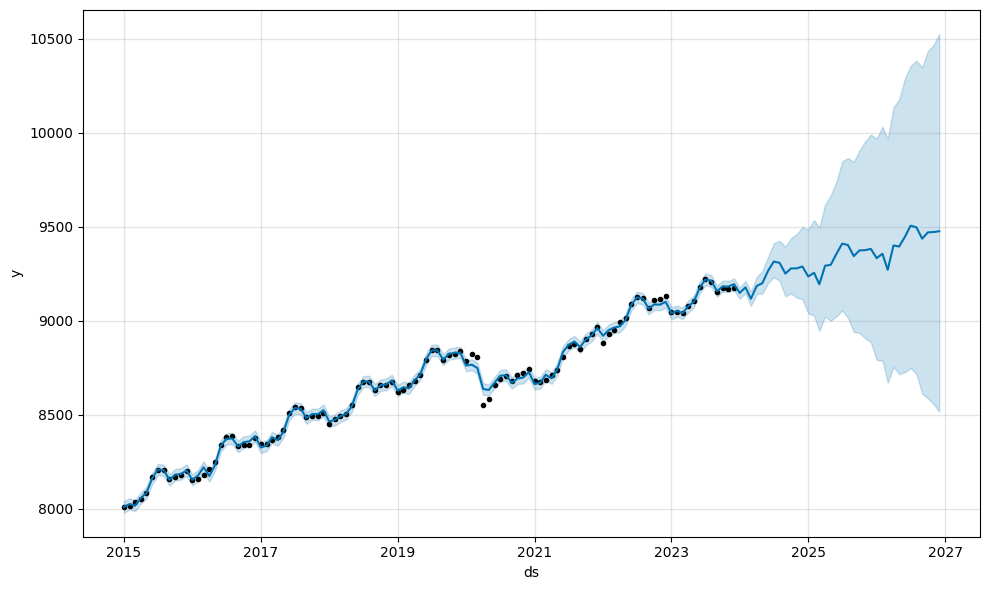

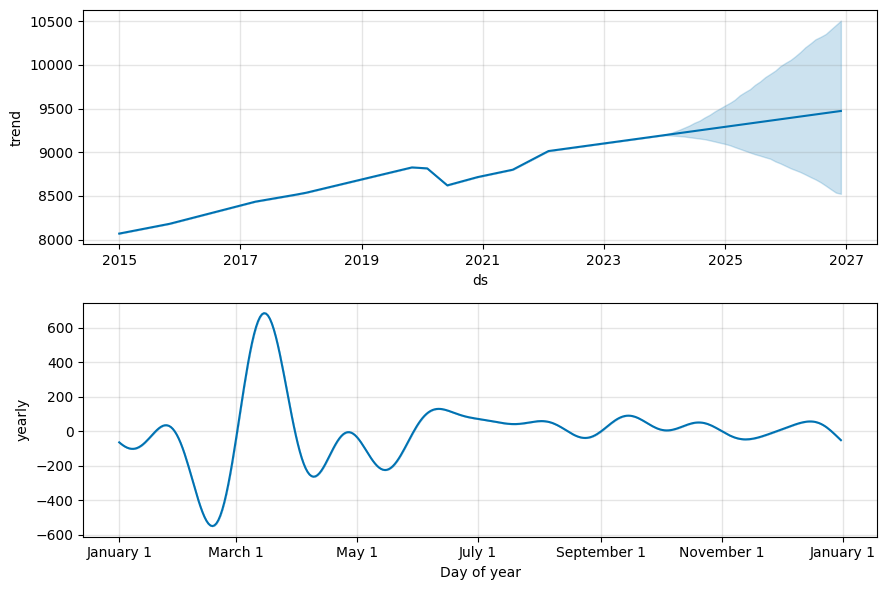

In [19]:

import prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt

df = df.rename(columns={'Date': 'ds'})
df['y'] = df['Value']
#df = df.set_index('ds')

m = prophet.Prophet(interval_width = .9)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.fit(df)
future = m.make_future_dataframe(freq = 'M', periods=36)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.show()

fig2 = plot_components(m, forecast)
plt.show()

Retail Trade

In [13]:
df = pd.read_excel('retail_trade.xlsx')

df.head()

,Date,periodName,Value
0,2023-12-01,December,15979.1
1,2023-11-01,November,15859.4
2,2023-10-01,October,15564.5
3,2023-09-01,September,15414.9
4,2023-08-01,August,15503.8


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/95qdfx4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/dd_mqhpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80671', 'data', 'file=/tmp/tmpf3m75yah/95qdfx4n.json', 'init=/tmp/tmpf3m75yah/dd_mqhpe.json', 'output', 'file=/tmp/tmpf3m75yah/prophet_modela__p3ncz/prophet_model-20240109004648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


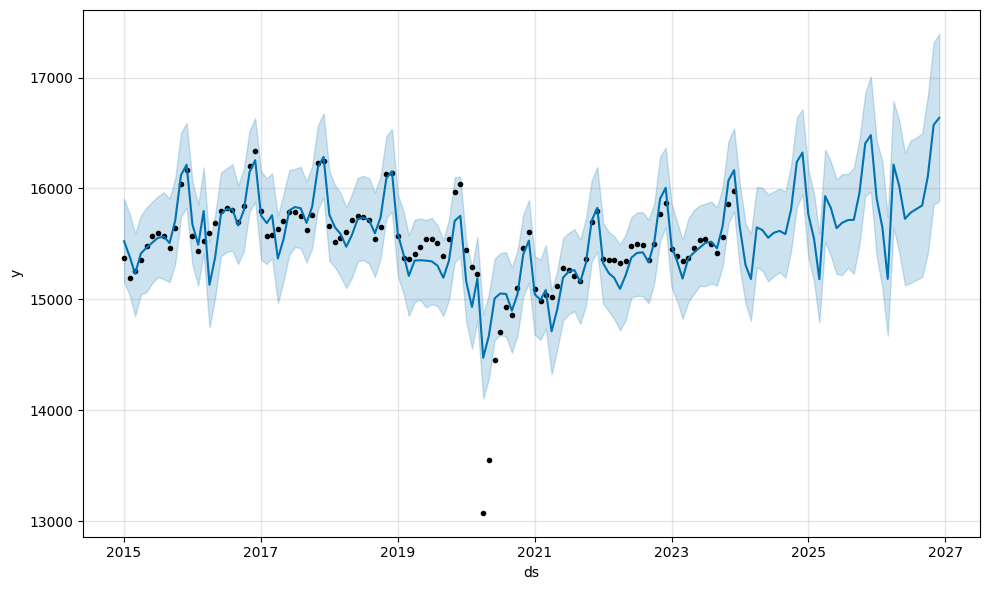

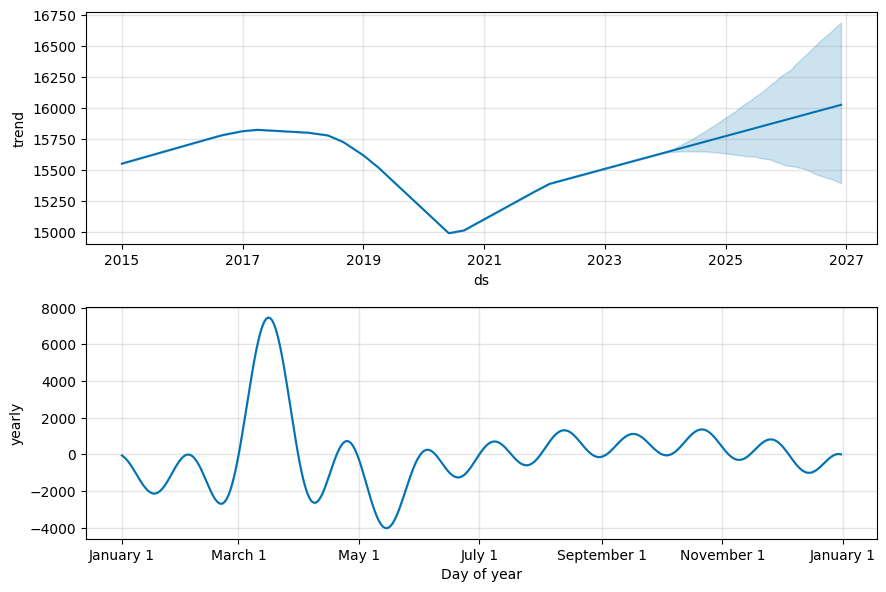

In [17]:

import prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt

df = df.rename(columns={'Date': 'ds'})
df['y'] = df['Value']
#df = df.set_index('ds')

m = prophet.Prophet(interval_width = .9)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.fit(df)
future = m.make_future_dataframe(freq = 'M', periods=36)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.show()

fig2 = plot_components(m, forecast)
plt.show()

Professional and Business Services

In [11]:
df = pd.read_excel('professional_business_services.xlsx')

df.head()

,Date,periodName,Value
0,2023-12-01,December,23012
1,2023-11-01,November,23182
2,2023-10-01,October,23222
3,2023-09-01,September,23047
4,2023-08-01,August,23086


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/5dzcpgoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/bsdb6cho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65925', 'data', 'file=/tmp/tmpf3m75yah/5dzcpgoa.json', 'init=/tmp/tmpf3m75yah/bsdb6cho.json', 'output', 'file=/tmp/tmpf3m75yah/prophet_modelbkn65b3q/prophet_model-20240109004545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


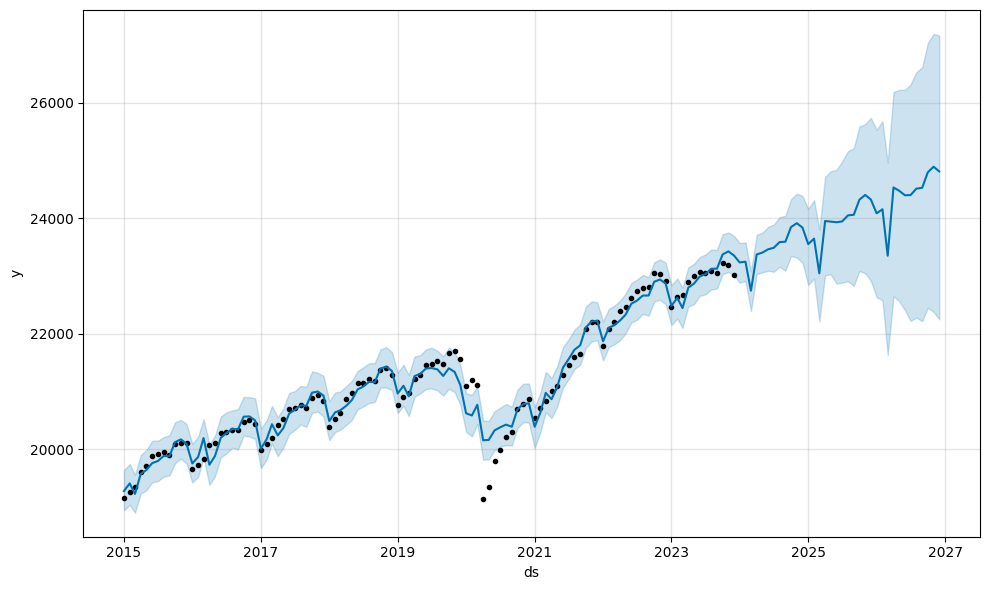

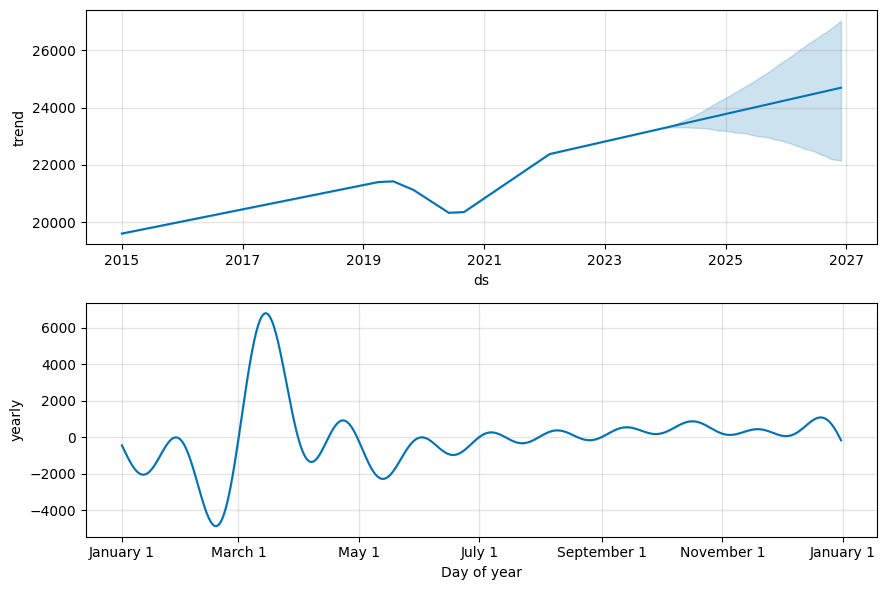

In [12]:

import prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt

df = df.rename(columns={'Date': 'ds'})
df['y'] = df['Value']
#df = df.set_index('ds')

m = prophet.Prophet(interval_width = .9)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.fit(df)
future = m.make_future_dataframe(freq = 'M', periods=36)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.show()

fig2 = plot_components(m, forecast)
plt.show()

Manufacturing

In [24]:
df = pd.read_excel('manufacturing.xlsx')

df.head()

,Date,periodName,Value
0,2023-12-01,December,13013
1,2023-11-01,November,12990
2,2023-10-01,October,12962
3,2023-09-01,September,12995
4,2023-08-01,August,13042


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/3rhnj_2u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf3m75yah/gzrhqeow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37094', 'data', 'file=/tmp/tmpf3m75yah/3rhnj_2u.json', 'init=/tmp/tmpf3m75yah/gzrhqeow.json', 'output', 'file=/tmp/tmpf3m75yah/prophet_model4zgxwuys/prophet_model-20240109004315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:43:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:43:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


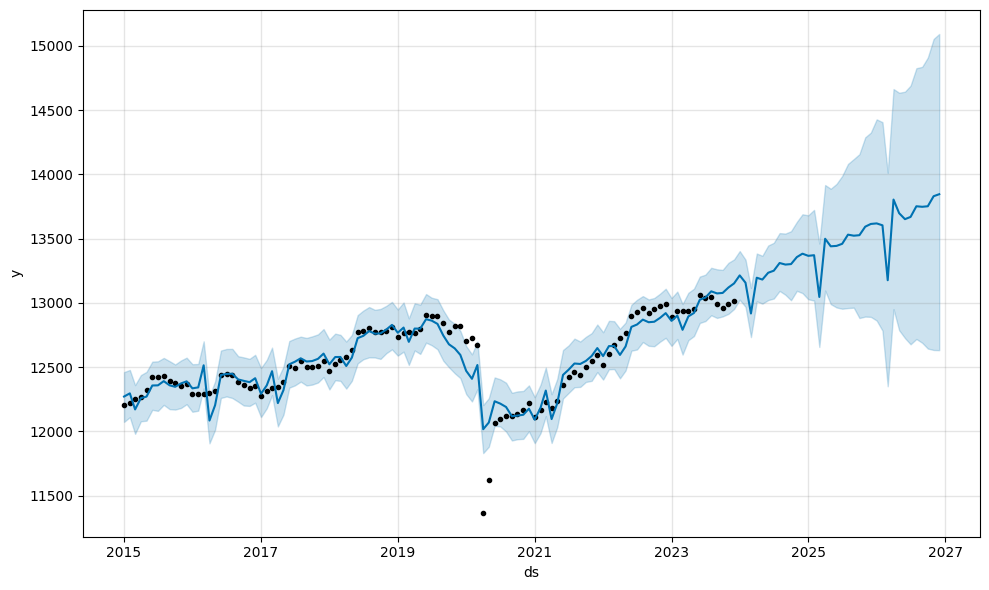

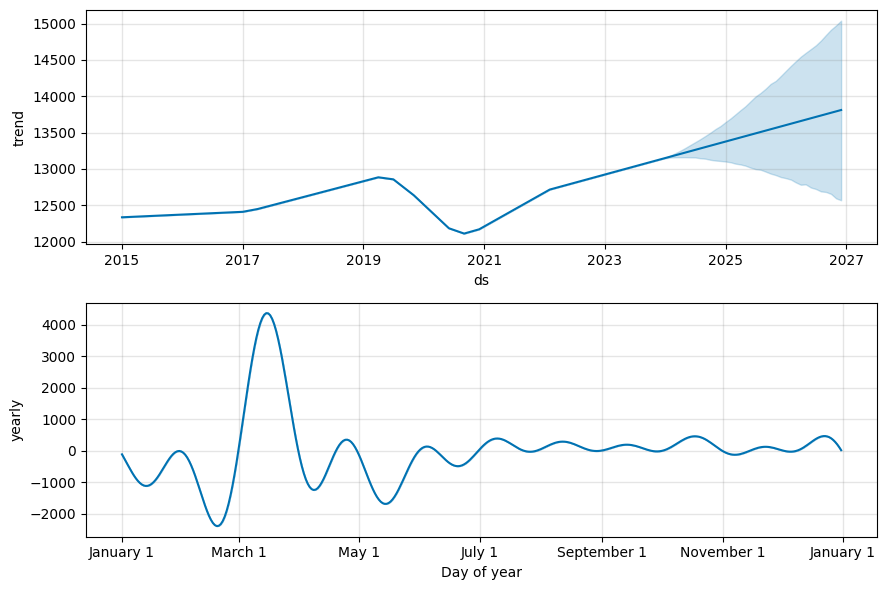

In [7]:

import prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt

df = df.rename(columns={'Date': 'ds'})
df['y'] = df['Value']
#df = df.set_index('ds')

m = prophet.Prophet(interval_width = .9)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.fit(df)
future = m.make_future_dataframe(freq = 'M', periods=36)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.show()

fig2 = plot_components(m, forecast)
plt.show()

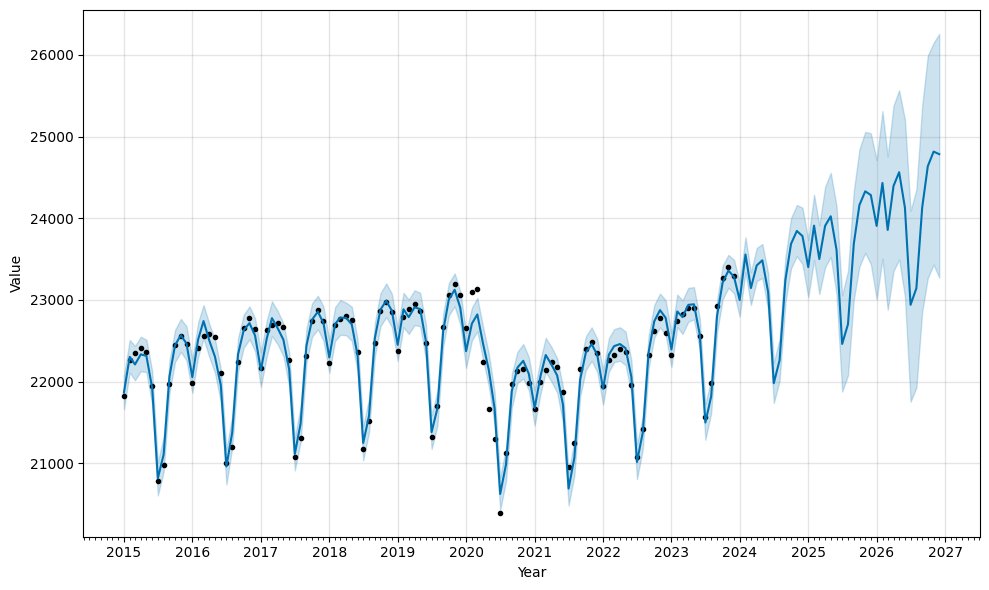

In [32]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator
from matplotlib.ticker import NullFormatter
fig1 = m.plot(forecast, xlabel = "Year", ylabel = "Value")
ax = fig1.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_minor_formatter(NullFormatter())
plt.show()

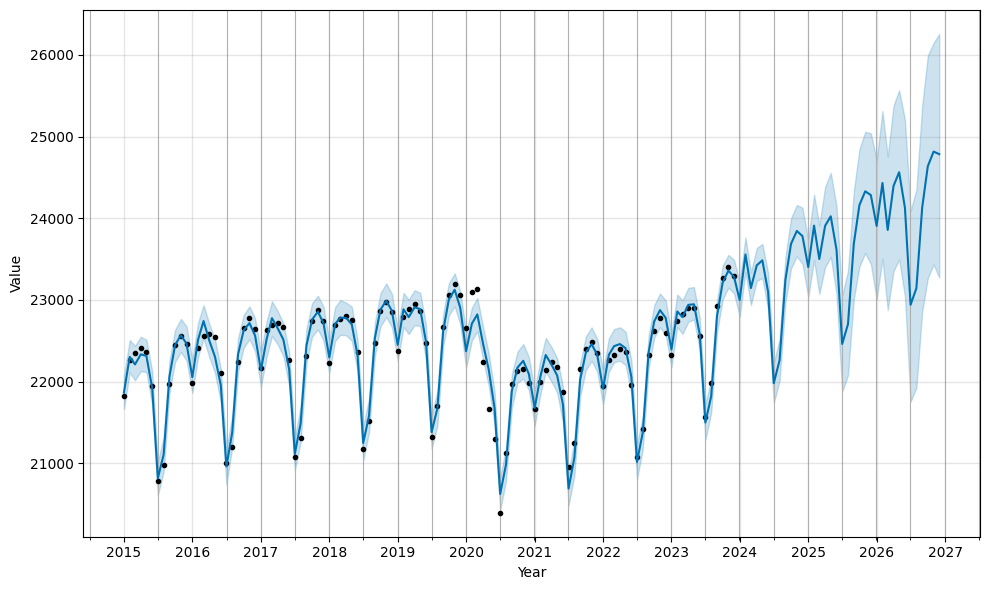

In [42]:
import numpy as np

from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.ticker import AutoMinorLocator
fig1 = m.plot(forecast, xlabel = "Year", ylabel = "Value")
ax = fig1.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# Add grid lines for the minor ticks
ax.grid(which='minor')
#x= [ 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov']
#plt.xticks(np.arange(0.5,10.5,1), x)
plt.show()